In [33]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from lsmc import *
from visualizingData import *
import pandas as pd
import os
import ast

from decimal import Decimal

In [34]:
loaded_matrix = np.load('.\\artificialData\\artificialRatingsV3.npy', allow_pickle=True).item()
sampled_mask = np.load('.\\artificialData\\mask.npy', allow_pickle=True).item().toarray()
dense_matrix = loaded_matrix.toarray()

In [35]:
dense_matrix = dense_matrix[:200,:150]
sampled_mask = sampled_mask[:200,:150]

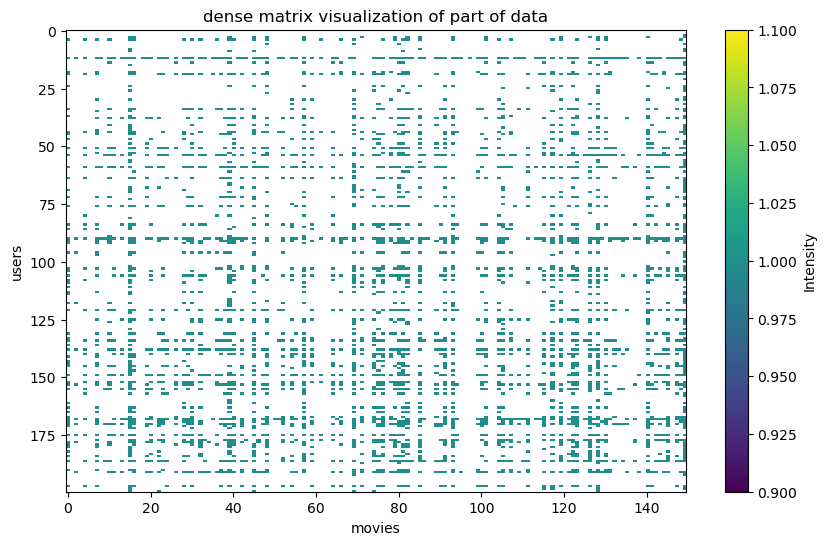

In [36]:
visualizeData(np.where(sampled_mask==0,np.nan,1))

In [58]:
# Matrix dimensions
m, n = dense_matrix.shape

# Initializing matrices and variables
R = dense_matrix  # Original dense matrix
P_init = np.random.rand(m, n)  # Initial guess for matrix P
u_init = np.zeros((m, n))  # Initial values for u
y_init = np.zeros((m, n))  # Initial values for y
s_init = 1  # Initial value for s

# Define ranges for hyperparameters
lamda=.01  # Regularization parameter λ values
gamma = .001
delta = 1e-2  # Tolerance level for optimization
num_iterations = 1000  # Number of iterations for optimization
r_stop = 20

# Generate rhos for each lambda
rho= .02


In [59]:
# Calculate epsilon based on matrix size and gamma
epsilon = m * n * gamma  # Error threshold as defined in the paper

# Print current parameter settings


# Run the optimization function with the current parameters
P_final, Z_final, u_final, y_final, s_final, errors, r_errors, rank = LMSC_optimize_rank_stop(
    rho, lamda, R, P_init, sampled_mask, u_init, y_init, s_init, delta, epsilon, num_iterations, r_stop
)

Is lambda smaller then rho?: True


In [60]:
lamda/rho

0.5

In [61]:
rank

20

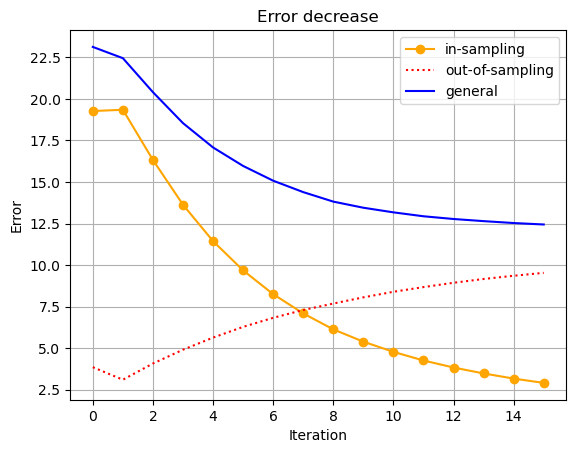

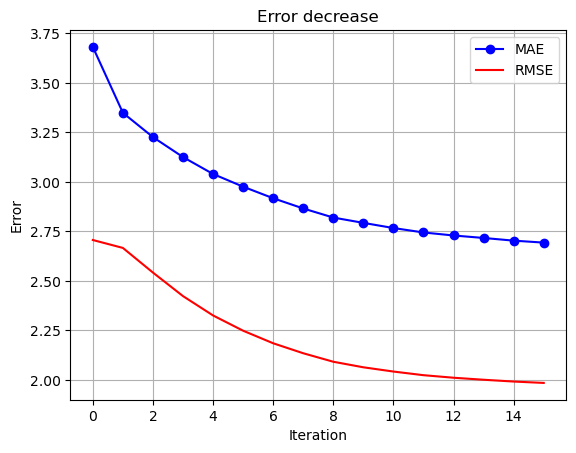

In [62]:
relErrorPlot(errors=r_errors)
errorPlot(errors=errors)

In [63]:
csc_matrix(Z_final).nnz/np.prod(Z_final.shape)

0.37453333333333333

In [66]:

def SVD_truncated(A, k):
    """
    Apply the thresholding operator to the singular values of X
    """
    U, S, V = np.linalg.svd(A, full_matrices=False)
    n= len(S)
    
    if k > n:
        k = n
    
    S= S[:k]
    U = U[:, :k]
    V = V[:k, :]
    return (U* S) @ V


In [67]:
100* np.linalg.norm(SVD_truncated(dense_matrix,20)-dense_matrix, 'fro')/np.linalg.norm(dense_matrix, 'fro')


35.45712492799889

In [64]:
100*np.linalg.norm((P_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.73344319407853

In [65]:
100*np.linalg.norm((Z_final-dense_matrix),'fro')/np.linalg.norm(dense_matrix,'fro')

49.86943779810618